In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


##  What Logistic Regression Is

* Despite the name, **logistic regression is a classification algorithm**, not a regression one.
* It is used mainly for **binary classification** (e.g., spam vs. not spam, disease vs. no disease).
* Instead of predicting a continuous value (like linear regression), it predicts a **probability** that an input belongs to class 1.

---

##  The Core Idea

1. Start with a **linear model**:

   $$
   z = Xw + b
   $$

   where $X$ is your input features, $w$ is the weight vector, and $b$ is the bias.

2. Apply the **sigmoid function** to squash the output into $[0,1]$:

   $$
   \hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
   $$

   * If $\hat{y} \approx 0.9$, the model is confident the class is 1.
   * If $\hat{y} \approx 0.1$, it’s confident the class is 0.

---

##  The Loss Function

* Instead of MSE (bad for probabilities), logistic regression uses **binary cross-entropy**:

  $$
  L = -\frac{1}{N} \sum_{i=1}^N \big[ y_i \log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i) \big]
  $$
* This penalizes wrong confident predictions heavily.

  * If the true label is 1 but $\hat{y}=0.01$, the loss is very large.
  * Encourages the model to output probabilities close to true labels.

---

##  Optimization

* You minimize the loss using **gradient descent**, just like in linear regression.
* The gradients turn out very elegant:

  * For weights:

    $$
    \nabla_w = \frac{1}{N} X^T(\hat{y} - y)
    $$
  * For bias:

    $$
    \nabla_b = \frac{1}{N}\sum (\hat{y} - y)
    $$

---

##  Predictions

* During training → use probabilities ($\hat{y}$) for computing loss and updates.
* During inference →

  * If $\hat{y} \geq 0.5$, predict **class 1**.
  * Otherwise, predict **class 0**.



In [2]:
class LogReg:
    def __init__(self,alpha=0.01, limit=1000, epsilon=1e-6,threshold=0.5):
        self.alpha = alpha
        self.limit = limit
        self.epsilon = epsilon
        self.threshold=threshold
        self.w = np.random.rand()
        self.b = np.random.rand()

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))


    def fit(self, X_train, y_train):
        eps = 1e-15
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        self.w = np.zeros(X_train.shape[1])

        losses = []

        for iteration in range(self.limit):

            y_hats = self.sigmoid(X_train.dot(self.w) + self.b)

            loss = -np.mean(y_train*np.log(y_hats+eps)+(1-y_train)*np.log(1-y_hats+eps))
            losses.append(loss)

            gradient_w = X_train.T.dot(y_hats - y_train)/len(X_train)
            gradient_b = np.sum(y_hats - y_train)/len(X_train)


            self.w -= self.alpha * gradient_w
            self.b -= self.alpha * gradient_b

            if np.linalg.norm(gradient_w)*self.alpha < self.epsilon and abs(gradient_b*100*self.alpha) < self.epsilon:
                break

        return losses


    def predict(self, X):
        probs = self.sigmoid(X.dot(self.w) + self.b)
        return (probs >= self.threshold).astype(int)
    def predict_proba(self,X):
        return self.sigmoid(X.dot(self.w) + self.b)


In [12]:
def plot_decision_boundary(ax, model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]


    if isinstance(model, LogReg):
        probs = model.predict(grid).reshape(xx.shape)
    else:
        probs = model.predict(grid).reshape(xx.shape)


    ax.contourf(xx, yy, probs, alpha=0.3, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
    ax.set_title(title)

# ---------- Compare function ----------
def compare_models(X_train, y_train, X_test, y_test, dataset_name="Dataset"):

    custom_model = LogReg(alpha=0.1, limit=2000)
    custom_model.fit(X_train, y_train)
    y_pred_custom = custom_model.predict(X_test)
    acc_custom = accuracy_score(y_test, y_pred_custom)


    sklearn_model = LogisticRegression()
    sklearn_model.fit(X_train, y_train)
    y_pred_sklearn = sklearn_model.predict(X_test)
    acc_sklearn = accuracy_score(y_test, y_pred_sklearn)


    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    plot_decision_boundary(axs[0], custom_model, X_train, y_train, f"Custom LogReg\nAcc: {acc_custom:.2f}")
    plot_decision_boundary(axs[1], sklearn_model, X_train, y_train, f"Sklearn LogReg\nAcc: {acc_sklearn:.2f}")
    plt.suptitle(f"{dataset_name} - Model Comparison", fontsize=16)
    plt.tight_layout()
    plt.show()

    print(f"{dataset_name} - Custom LogReg Accuracy: {acc_custom:.2f}")
    print(f"{dataset_name} - Sklearn LogReg Accuracy: {acc_sklearn:.2f}")


Testing on Linear Classification dataset


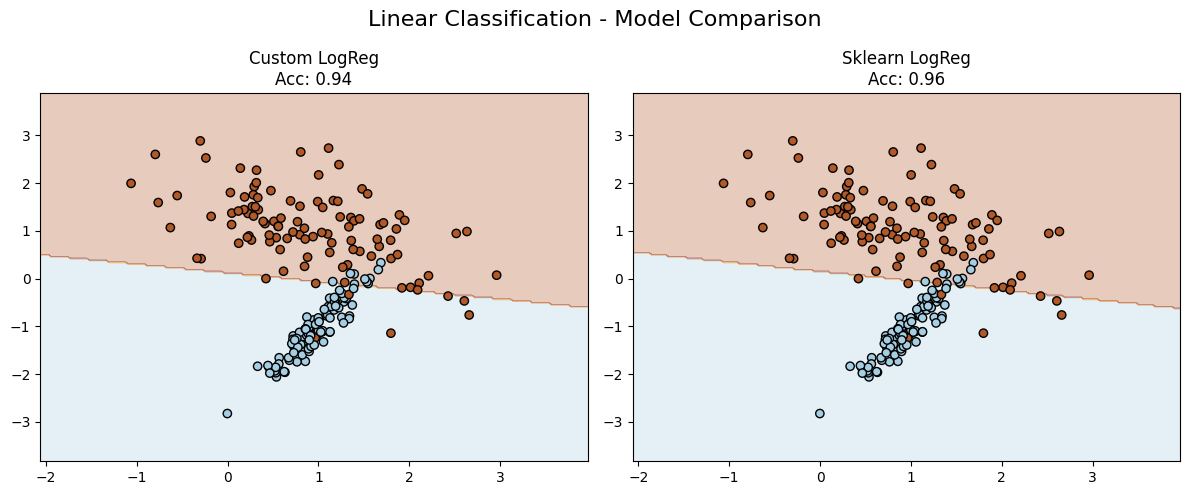

Linear Classification - Custom LogReg Accuracy: 0.94
Linear Classification - Sklearn LogReg Accuracy: 0.96

Testing on Moons dataset


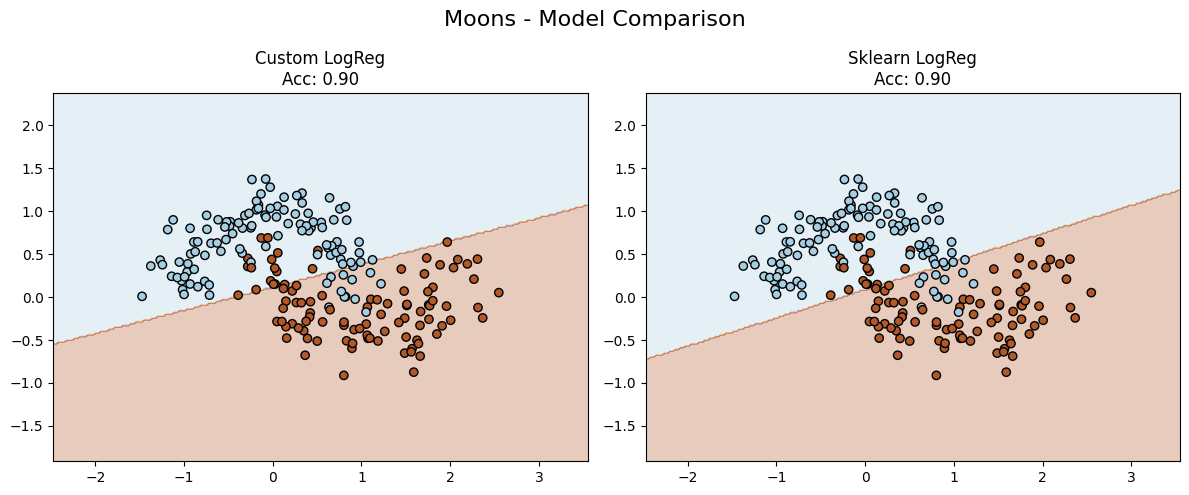

Moons - Custom LogReg Accuracy: 0.90
Moons - Sklearn LogReg Accuracy: 0.90

Testing on Circles dataset


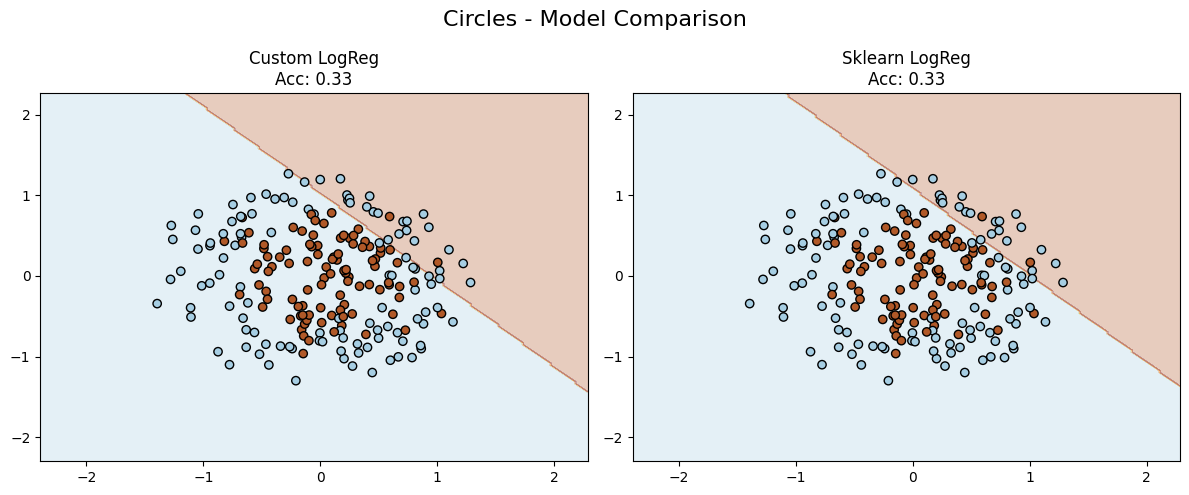

Circles - Custom LogReg Accuracy: 0.33
Circles - Sklearn LogReg Accuracy: 0.33


In [13]:
datasets = [
    ("Linear Classification", make_classification(n_samples=300, n_features=2, n_classes=2,
                                                  n_informative=2, n_redundant=0,
                                                  n_clusters_per_class=1, random_state=42)),
    ("Moons", make_moons(n_samples=300, noise=0.2, random_state=42)),
    ("Circles", make_circles(n_samples=300, noise=0.2, factor=0.5, random_state=42))
]

for name, (X, y) in datasets:
    print(f"\nTesting on {name} dataset")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    compare_models(X_train, y_train, X_test, y_test, name)